In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import shapiro, levene, ttest_ind
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0301.csv'
case0301 = pd.read_csv(path)
case0301.head()

,Rainfall,Treatment
0,1202.6,Unseeded
1,830.1,Unseeded
2,372.4,Unseeded
3,345.5,Unseeded
4,321.2,Unseeded


In [2]:
# Displaying the structure of the DataFrame
print(case0301.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rainfall   52 non-null     float64
 1   Treatment  52 non-null     object 
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes
None


In [7]:
seeded = case0301[case0301['Treatment'] == 'Seeded']['Rainfall']

unseeded = case0301[case0301['Treatment'] == 'Unseeded']['Rainfall']

# Shapiro-Wilk tests
shapiro_seeded = shapiro(seeded)
shapiro_unseeded = shapiro(unseeded)

print("Shapiro-Wilk test for Seeded:")
print(shapiro_seeded)
print("\nShapiro-Wilk test for Unseeded:")
print(shapiro_unseeded)

Shapiro-Wilk test for Seeded:
ShapiroResult(statistic=0.6562643647193909, pvalue=1.4110307802184252e-06)

Shapiro-Wilk test for Unseeded:
ShapiroResult(statistic=0.6021585464477539, pvalue=3.131404469058907e-07)


In [8]:
# Levene's test
levene_test = levene(seeded, unseeded)

print("\nLevene's test:")
print(levene_test)


Levene's test:
LeveneResult(statistic=2.8628259184916556, pvalue=0.09687209795356197)


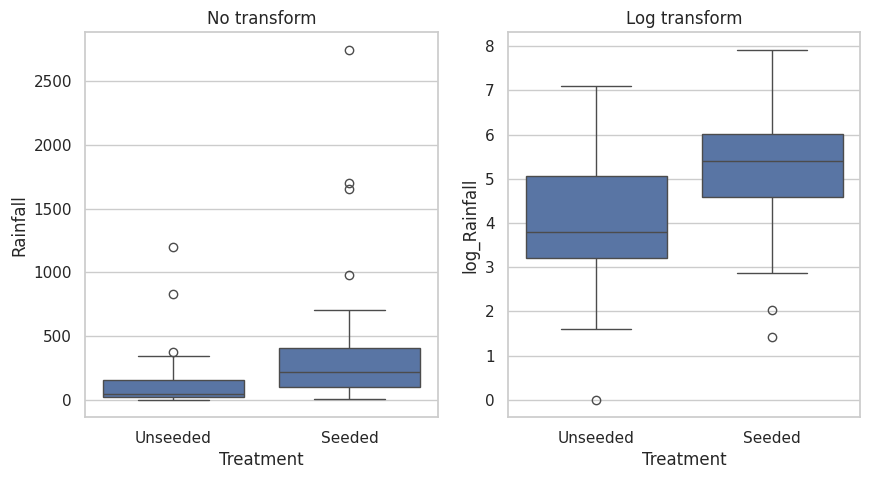

In [10]:
# Boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Rainfall', x='Treatment', data = case0301)
plt.title('No transform')

plt.subplot(1, 2, 2)
case0301['log_Rainfall'] = np.log(case0301['Rainfall'])
sns.boxplot(y='log_Rainfall', x='Treatment', data = case0301)
plt.title('Log transform')
plt.show()

In [12]:
# Shapiro-Wilk tests for log-transformed data
seeded_log = case0301[case0301['Treatment'] == 'Seeded']['log_Rainfall']
unseeded_log = case0301[case0301['Treatment'] == 'Unseeded']['log_Rainfall']

shapiro_seeded_log = shapiro(seeded_log)
shapiro_unseeded_log = shapiro(unseeded_log)

print("Shapiro-Wilk test for log-transformed Seeded:")
print(shapiro_seeded_log)
print("\nShapiro-Wilk test for log-transformed Unseeded:")
print(shapiro_unseeded_log)

Shapiro-Wilk test for log-transformed Seeded:
ShapiroResult(statistic=0.965905487537384, pvalue=0.5207513570785522)

Shapiro-Wilk test for log-transformed Unseeded:
ShapiroResult(statistic=0.9799404740333557, pvalue=0.8726603388786316)


In [13]:
# Levene's test for log-transformed data
levene_test_log = levene(seeded_log, unseeded_log)

print("\nLevene's test for log-transformed data:")
print(levene_test_log)


Levene's test for log-transformed data:
LeveneResult(statistic=0.07782769187841675, pvalue=0.7814137903054742)


In [16]:
t_test_original = ttest_ind(seeded,
                             unseeded,
                             equal_var=True, alternative='greater')

print("\nOne-sided t-test for original data:")
print(t_test_original)


One-sided t-test for original data:
TtestResult(statistic=1.9982446280649688, pvalue=0.025571601199239034, df=50.0)


In [15]:
# t-tests
t_test_log = ttest_ind(seeded_log,
                       unseeded_log,
                       equal_var=True, alternative='greater')


print("\nOne-sided t-test for log-transformed data:")
print(t_test_log)


One-sided t-test for log-transformed data:
TtestResult(statistic=2.5443693488547234, pvalue=0.007041329483603202, df=50.0)


In [19]:
t_test_log = ttest_ind(seeded_log,
                       unseeded_log,
                       equal_var=True, alternative='two-sided')

low, high = t_test_log.confidence_interval()
print(low, high)

0.24086505030952887 2.0466972486197323


In [20]:
# Confidence interval for the log-transformed t-test
confidence_interval = np.exp([low, high])
confidence_interval

array([1.27234932, 7.74228798])

In [27]:
np.percentile(seeded_log, [75, 25])

array([6.00069899, 4.58147959])

In [34]:
IQR1 = np.subtract(*np.percentile(seeded_log, [75, 25]))
IQR1

1.419219403051902

In [37]:
outlier_threshold1 = 1.5*IQR1
outlier_threshold1

2.128829104577853

In [38]:
outliers1 = seeded_log < (np.median(seeded_log) - outlier_threshold1)
# Removing outliers
df1 = seeded_log[~outliers1]

In [40]:
IQR2 = np.subtract(*np.percentile(unseeded_log, [75, 25]))
outlier_threshold2 = 1.5*IQR2
outliers2 = unseeded_log < (np.median(unseeded_log) - outlier_threshold2)
df2 = unseeded_log[~outliers2]

In [41]:
# Performing t-test without outliers
t_test_no_outliers = ttest_ind(df1, df2)

print("\nT-test after removing outliers:")
print(t_test_no_outliers)


T-test after removing outliers:
TtestResult(statistic=3.5623228130516424, pvalue=0.0008687299296970976, df=46.0)


# your turn

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import shapiro, levene, ttest_ind
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0332.csv'
ex0332 = pd.read_csv(path)
ex0332.head()

,College,Type,InState,OutOfState
0,Albany State University,Public,5434,17048
1,Appalachian State University,Public,5175,16487
2,Argosy University: Nashville,Private,19596,19596
3,Brescia University,Private,18140,18140
4,Central Connecticut State University,Public,8055,18679


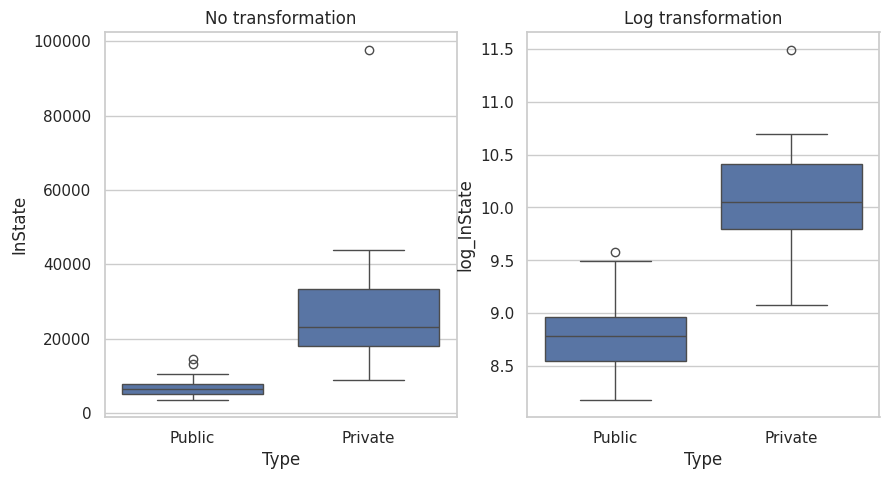

In [47]:
# Displaying boxplots without transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='InState', x='Type', data = ex0332)
plt.title('No transformation')

# Displaying boxplots with log transformation
plt.subplot(1, 2, 2)
ex0332['log_InState'] = np.log(ex0332['InState'])
sns.boxplot(y='log_InState', x='Type', data = ex0332)
plt.title('Log transformation')
plt.show()